# 데이터 불균형

* 실무에서는 대부분 데이터가 불균형하다
* 라벨의 균형을 맞춰주면 모델이 개선될 수 있다

<img src="../img/240603_02.png" width = "500">

<img src="../img/240603_01.png" width = "900">

# 0. 라이브러리 및 데이터 불러오기

* pip install imblearn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

import imblearn
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN

In [2]:
print("library version check")
print("numpy: ", np.__version__)
print("pandas: ", pd.__version__)
print("seaborn: ", sns.__version__)
print("matplotlib: ", mpl.__version__)
print("imblearn: ", imblearn.__version__)

library version check
numpy:  1.23.5
pandas:  1.5.1
seaborn:  0.12.1
matplotlib:  3.6.2
imblearn:  0.10.1


In [3]:
matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
mpl.style.use("default")
mpl.rcParams.update({"figure.constrained_layout.use": True})

sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

In [4]:
df = pd.read_csv("../data/sampling_data.csv",
                encoding = "utf-8",
                index_col = 0)

In [5]:
df.head()

,x,y,label
0,3.187033,-0.898236,0
1,-1.915836,-1.274032,0
2,0.972633,2.210568,0
3,1.544475,-1.119704,0
4,-1.655932,3.475853,0


In [6]:
## label의 개수를 세자
df["label"].value_counts()

0    500
1    100
Name: label, dtype: int64

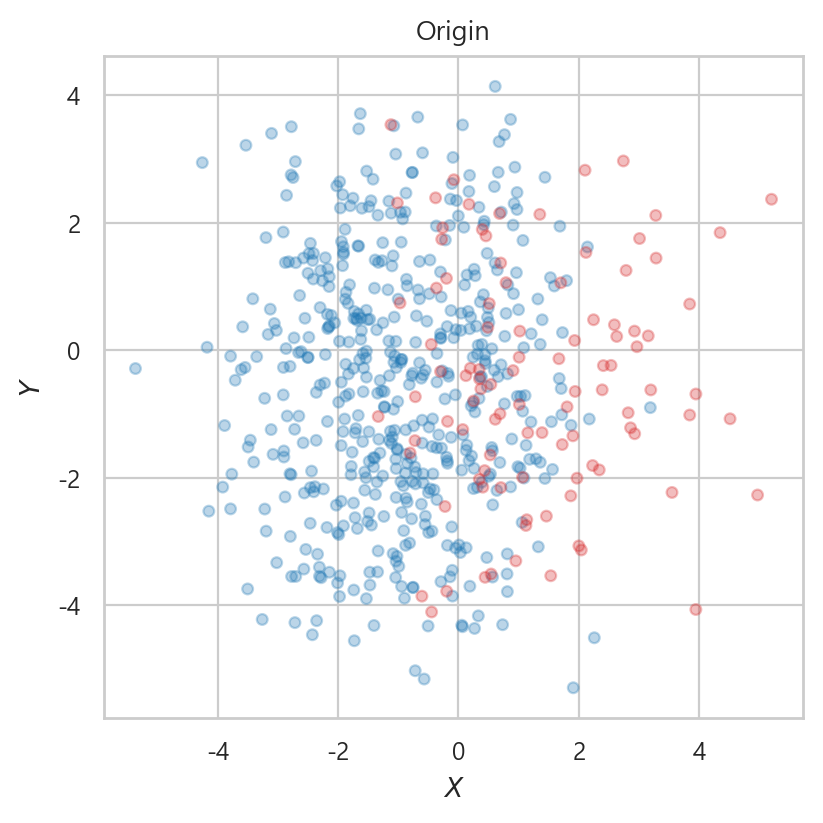

In [7]:
## label에 따른 scatter plot을 그리자

# sns.scatterplot(data = df, x = "x", y = "y", hue = "label", ax = ax)
colors = {0 : "tab:blue", 1: "tab:red"}
c = df["label"].replace(colors)

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(df["x"], df["y"], s = 15, alpha = 0.3, color=c)
ax.set(xlabel = R"$X$", 
       ylabel = R"$Y$", 
       title = "Origin");

# 1. Under Sampling

In [8]:
def color(arr):
    c = []
    for i in arr:
        if i == 0:
            c.append("tab:blue")
        else:
            c.append("tab:red")
    return c

In [9]:
def sampler_img(x, y, name):
    fig, (ax_origin, ax_sampling) = plt.subplots(1, 2, figsize = (6,3))

    ax_origin.scatter(df["x"], df["y"], 
                      s = 15, 
                      alpha = 0.3, 
                      color=c)
    ax_origin.set(xlabel = R"$X$", 
                  ylabel = R"$Y$", 
                  title="Origin")
    
    ax_sampling.scatter(x[:,0], x[:,1],
                        s = 15, 
                        alpha = 0.3,
                        color=color(y))

    ax_sampling.set(xlabel = R"$X$", 
                    ylabel = R"$Y$", 
                    title=f"{name}");

In [10]:
x_train = df[["x", "y"]].values
y_train = df["label"].values

## 1.1 Random Under Sampler

* 다수 class 데이터에서 random하게 제거하여 소수 class 데이터량에 맞춤

In [11]:
rus = RandomUnderSampler(random_state=0)
x_rus, y_rus = rus.fit_resample(x_train, y_train)

np.unique(y_rus, return_counts=True)

(array([0, 1], dtype=int64), array([100, 100], dtype=int64))

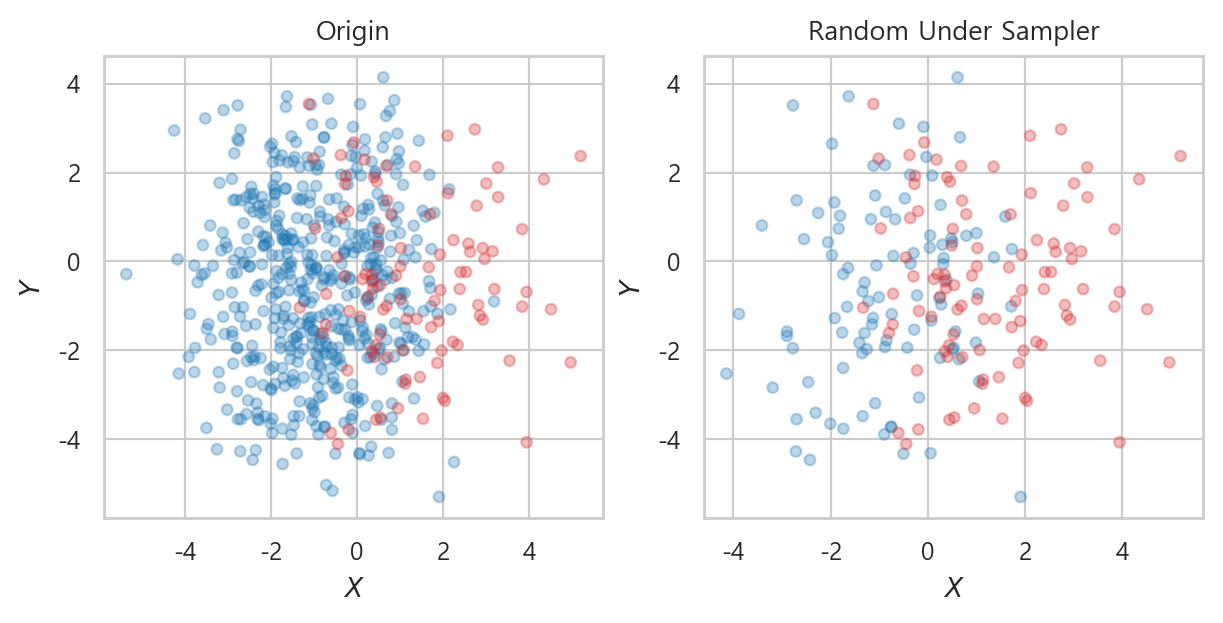

In [12]:
sampler_img(x_rus, y_rus, "Random Under Sampler")

## 1.2 Edited Nearest Neighbours

* 다수 class 데이터에서 $k$개(`n_neightbors`)의 Euclidean distance가 가까운 점을 찾고, 소수 class가 많이 섞여있으면 제거
* `kind_sel="all"`이면 주변에 모두 소수 class일 경우 제거
* 소수의 class 주변에 다수의 class가 제거됨

In [13]:
enn = EditedNearestNeighbours(kind_sel="all", n_neighbors=5)
x_enn, y_enn = enn.fit_resample(x_train, y_train)

np.unique(y_enn, return_counts=True)

(array([0, 1], dtype=int64), array([330, 100], dtype=int64))

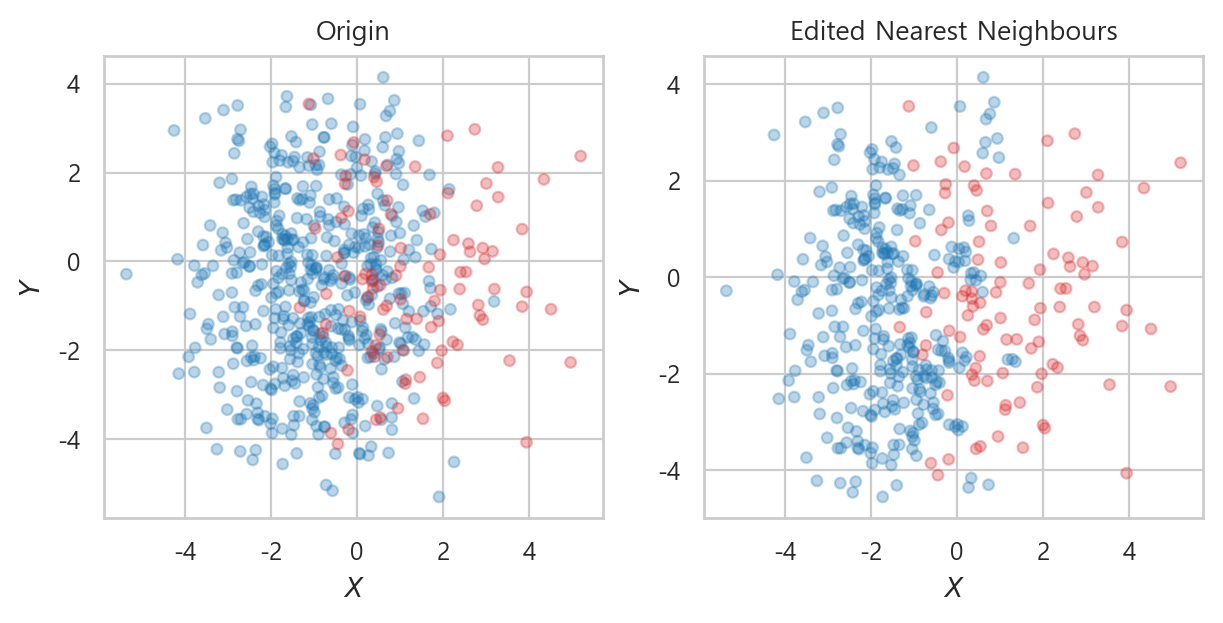

In [14]:
sampler_img(x_enn, y_enn, "Edited Nearest Neighbours")

# 2. Over Sampling

## 2.1 Random Over Sampler

* 소수 class를 랜덤하게 증가시킴
* 같은 데이터를 반복 생성하여 다수 class에 맞춤

In [15]:
ros = RandomOverSampler(random_state=0)
x_ros, y_ros = ros.fit_resample(x_train, y_train)

np.unique(y_ros, return_counts=True)

(array([0, 1], dtype=int64), array([500, 500], dtype=int64))

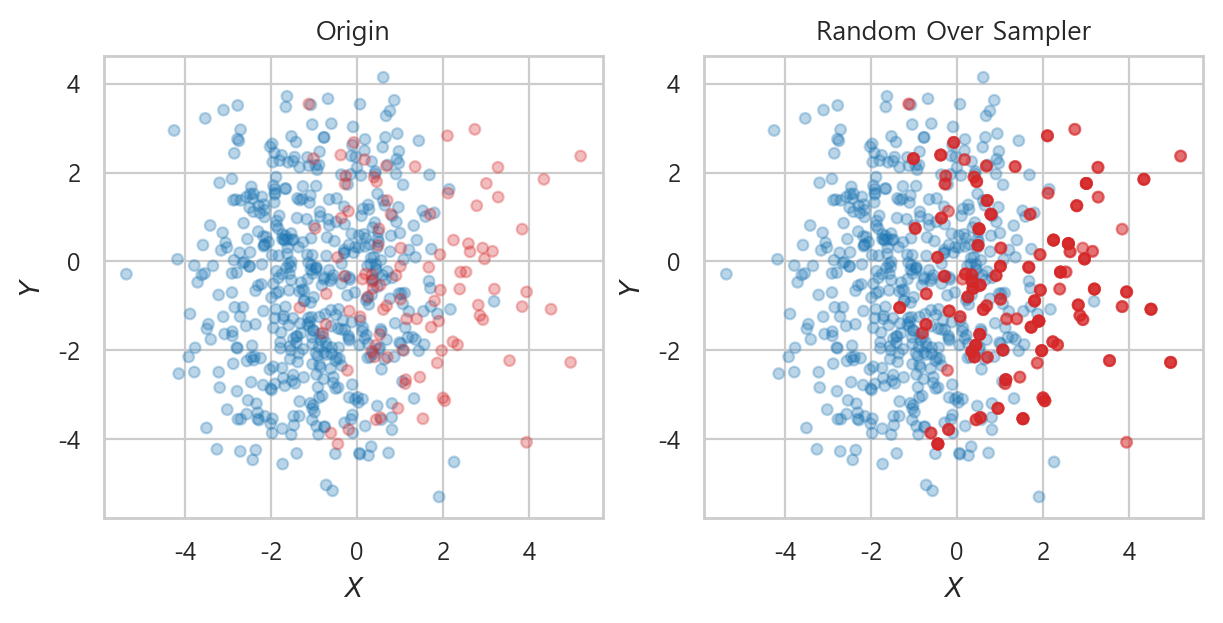

In [16]:
sampler_img(x_ros, y_ros, "Random Over Sampler")

## 2.2 SMOTE

* 소수의 class에서 임의의 점 $a$를 택하고
* $a$와 같은 class에서 Euclidean distance가 가까운 5개(`k_neighbors`)의 점찾아 임의로 $b$를 택함
* $a$와 $b$ 사이에 새로운 데이터를 생성

In [17]:
smo = SMOTE(random_state=0)
x_smo, y_smo = smo.fit_resample(x_train, y_train)

np.unique(y_smo, return_counts=True)

(array([0, 1], dtype=int64), array([500, 500], dtype=int64))

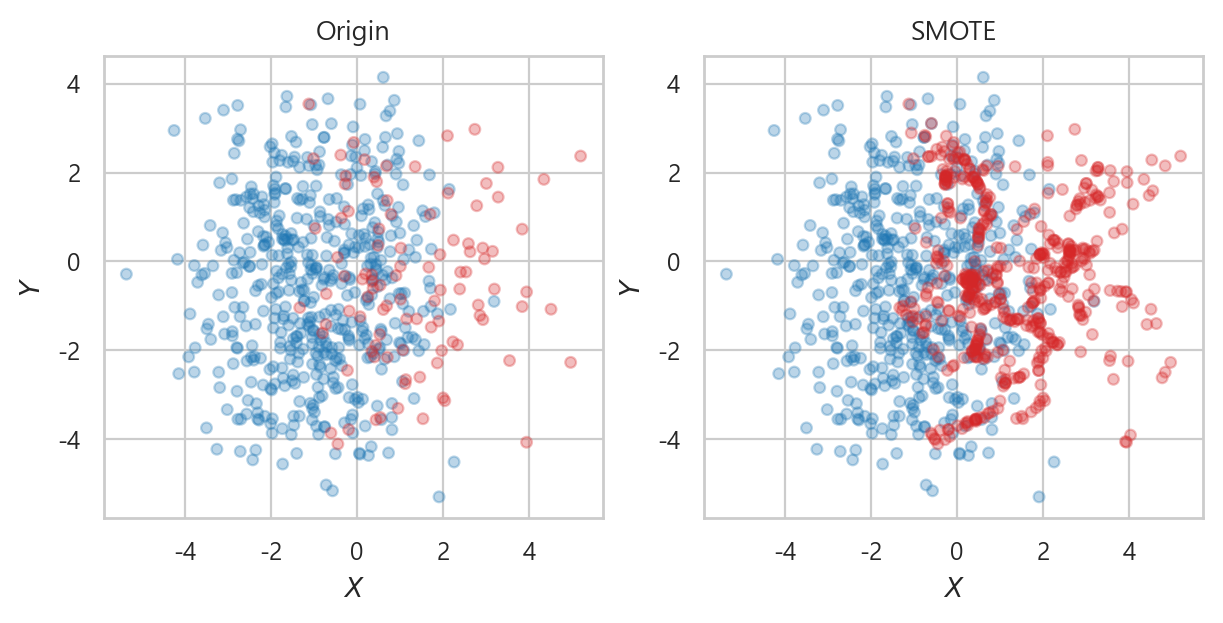

In [20]:
sampler_img(x_smo, y_smo, "SMOTE")

# 3 Combining Over and Under Sampling: SMOTEENN

* 다수의 class는 SMOTE 방식으로 줄이고, 
* 소수의 class는 ENN 방식으로 늘림

In [21]:
smoenn = SMOTEENN(random_state=0)
x_smoenn, y_smoenn = smoenn.fit_resample(x_train, y_train)

np.unique(y_smoenn, return_counts=True)

(array([0, 1], dtype=int64), array([320, 325], dtype=int64))

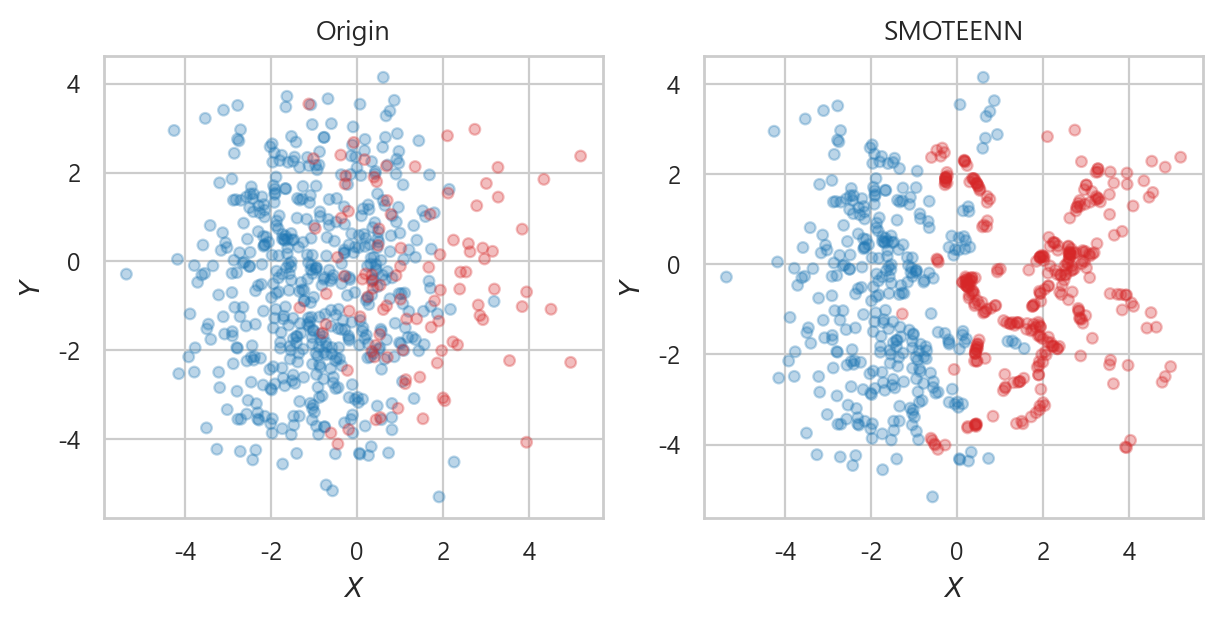

In [22]:
sampler_img(x_smoenn, y_smoenn, "SMOTEENN")

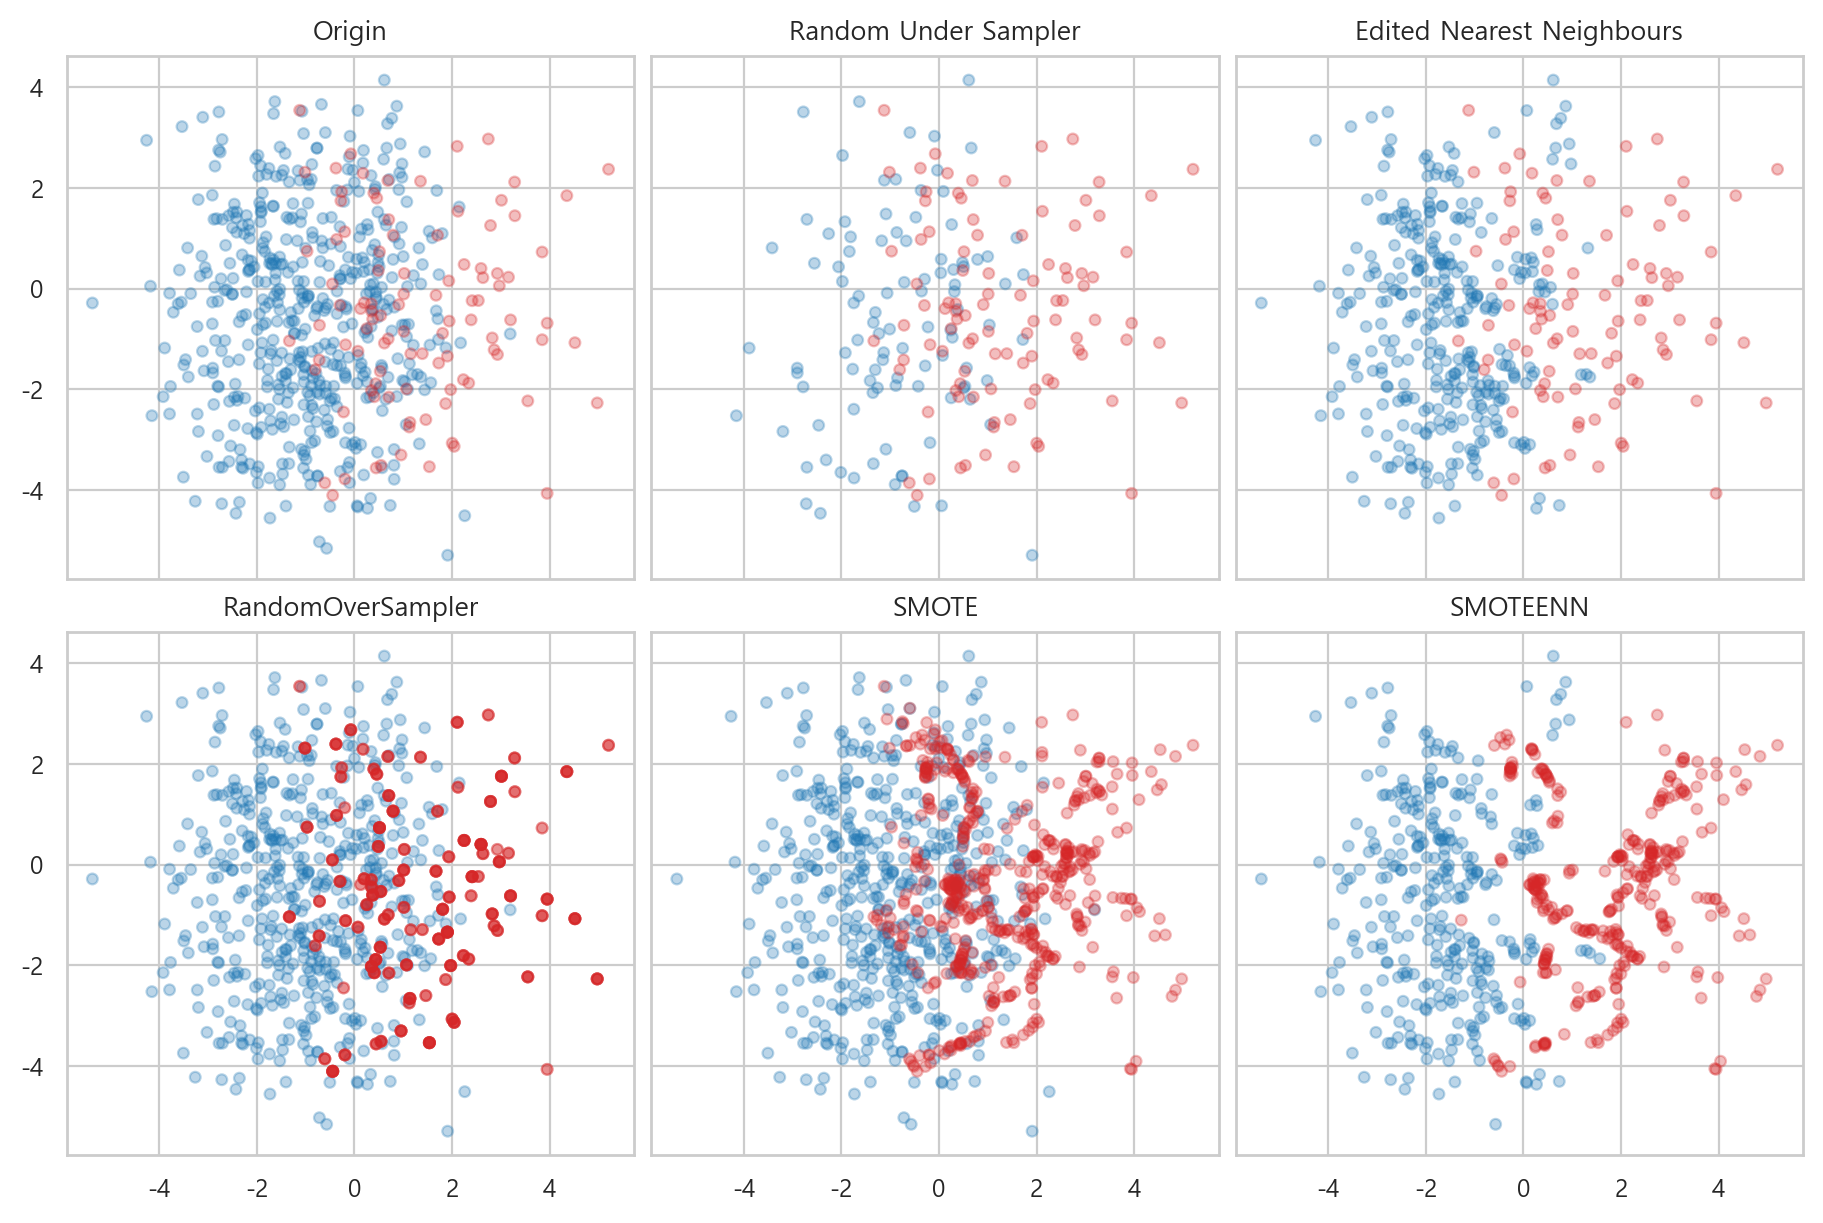

In [23]:
fig, axes  = plt.subplots(2, 3, figsize=(9,6), sharex = True, sharey = True)

sampling = {"Origin": [x_train, y_train], 
            "Random Under Sampler": [x_rus, y_rus],
            "Edited Nearest Neighbours": [x_enn, y_enn],
            "RandomOverSampler": [x_ros, y_ros],
            "SMOTE": [x_smo, y_smo],
            "SMOTEENN": [x_smoenn, y_smoenn]
           }

for name, ax in zip(sampling.keys(), axes.flat):
    ax.scatter(sampling[name][0][:,0], 
               sampling[name][0][:,1],
               s = 15, 
               alpha = 0.3,
               color=color(sampling[name][1]))

    ax.set(title=f"{name}");
